In [3]:
import numpy as np

In [4]:
%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def col_center(d):
    mean = np.mean(d, axis = 0)
    return d - mean

In [6]:
%cd ../data

/home/explorer/BMS270/data


In [7]:
from csv import reader, excel_tab
orfs = []
names = []
data = []
fin = reader(open("GSE88801_kallisto_TPMs_thresh10.cdt"),dialect=excel_tab)
header = next(fin)[2:]
for row in fin:
    orfs.append(row[0])
    names.append(row[1])
    data.append([float(i) for i in row[2:]])

In [8]:
D = np.array(data)
D.shape

(9939, 36)

In [9]:
A = col_center(D)

In [11]:
u,s,v = np.linalg.svd(A.T, full_matrices = False)
u.shape

(36, 36)

<IPython.core.display.Javascript object>


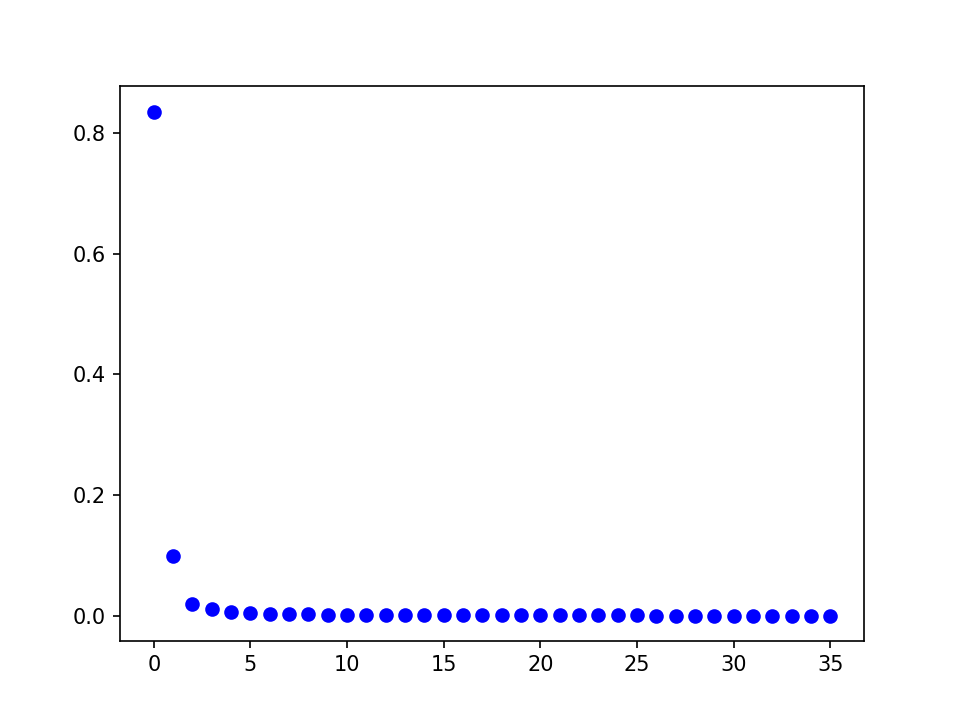

In [12]:
v = s**2
fig = plt.figure()
plt.plot(v/sum(v),"bo")

In [13]:
P = np.dot(A,u)
P.shape

(9939, 36)

<IPython.core.display.Javascript object>


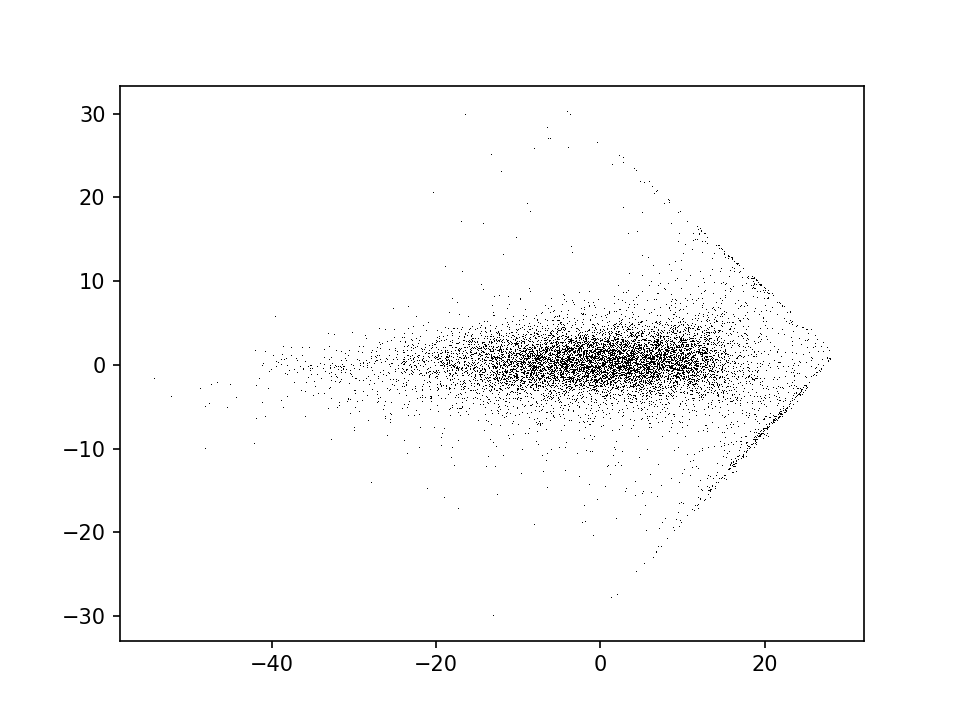

In [14]:
fig = plt.figure()
plt.plot(P[:,0],P[:,1],"k,")

In [16]:
from matplotlib.colors import LinearSegmentedColormap

In [17]:
# Simple blue->yellow non-overlapping gradient
cdict = {"red":((0.,0.,0.),(.5,0.,0.),(1.,1.,1.)),
         "green":((0.,0.,0.),(.5,0.,0.),(1.,1.,1.)),
         "blue":((0.,1.,1.),(.5,0.,0.),(1.,0.,0.))}
# map gradient to 256 actual RGBA values
cmap_yb = LinearSegmentedColormap("yb",cdict,256)

<IPython.core.display.Javascript object>


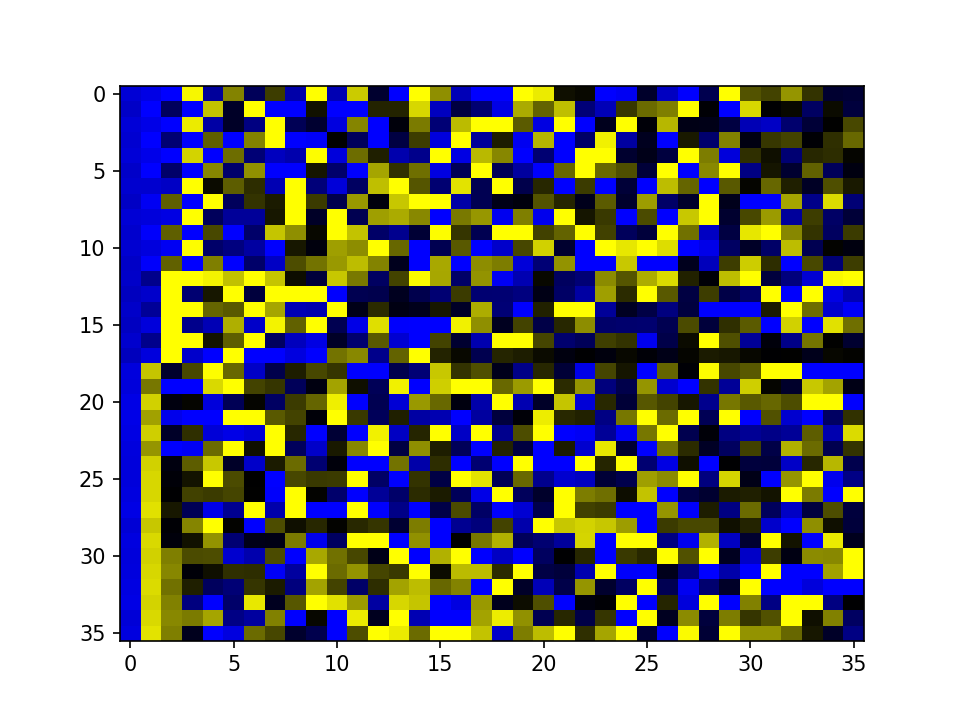

In [20]:
fig = plt.figure()
plt.imshow(u, interpolation="none", aspect="auto",cmap=cmap_yb,vmin=-.2,vmax=.2)

In [21]:
A = col_center(col_center(D.T).T)
u,s,v = np.linalg.svd(A.T, full_matrices = False)
u.shape

(36, 36)

In [22]:
P = np.dot(A,u)

<IPython.core.display.Javascript object>


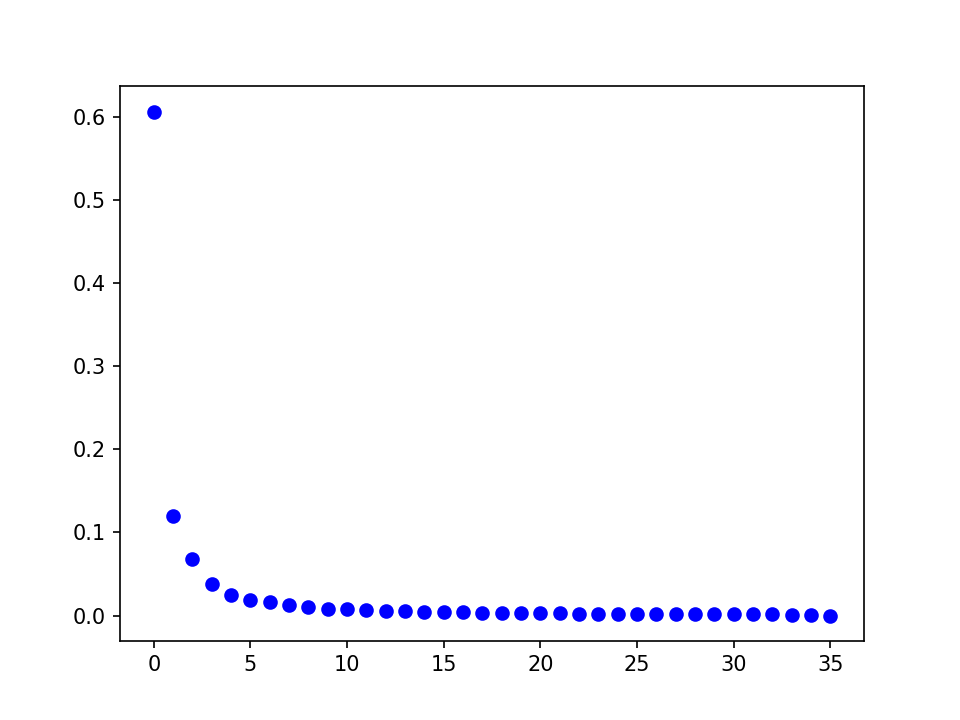

In [24]:
v = s**2
fig = plt.figure()
plt.plot(v/sum(v),"bo")

<IPython.core.display.Javascript object>


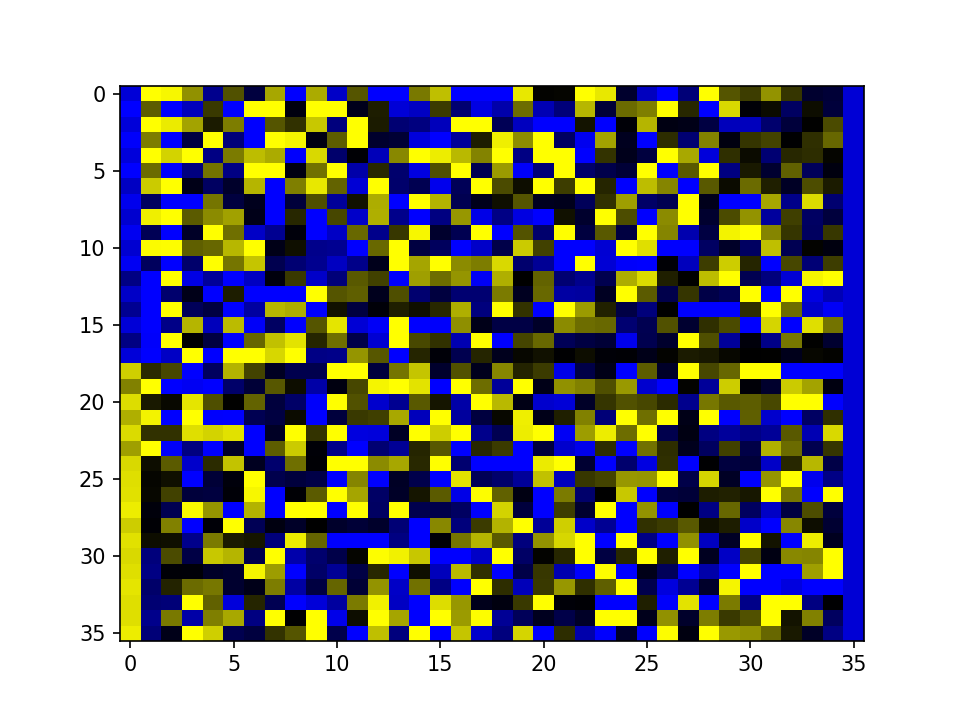

In [23]:
fig = plt.figure()
plt.imshow(u, interpolation="none", aspect="auto",cmap=cmap_yb,vmin=-.2,vmax=.2)

<IPython.core.display.Javascript object>


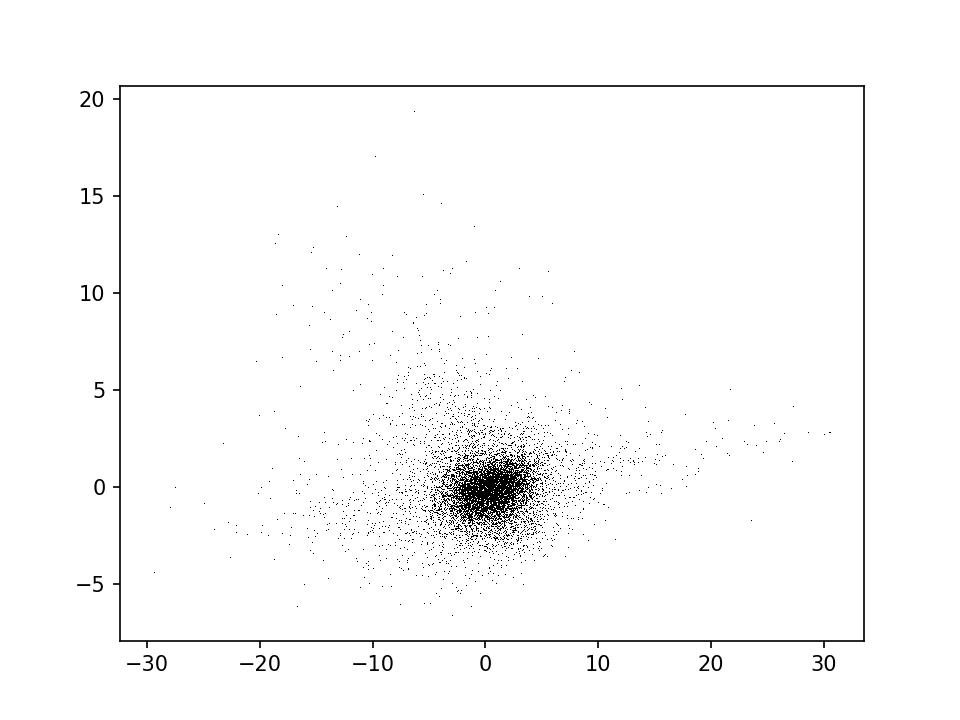

In [25]:
fig = plt.figure()
plt.plot(P[:,0],P[:,1],"k,")

<IPython.core.display.Javascript object>


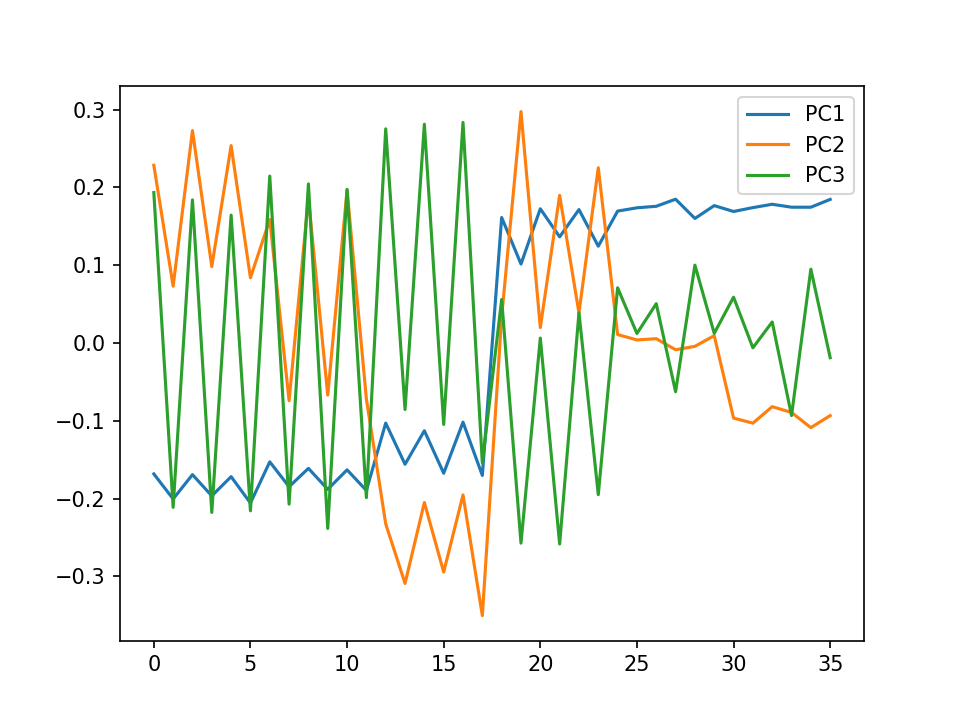

In [26]:
fig = plt.figure()
plt.plot(u[:,0],label="PC1")
plt.plot(u[:,1],label="PC2")
plt.plot(u[:,2],label="PC3")
plt.legend()

In [27]:
cut2x = np.max(A,axis=1) >= 1

In [28]:
Acut2x = A[cut2x]
Acut2x.shape

(4872, 36)

In [29]:
Pcut2x = P[cut2x]

<IPython.core.display.Javascript object>


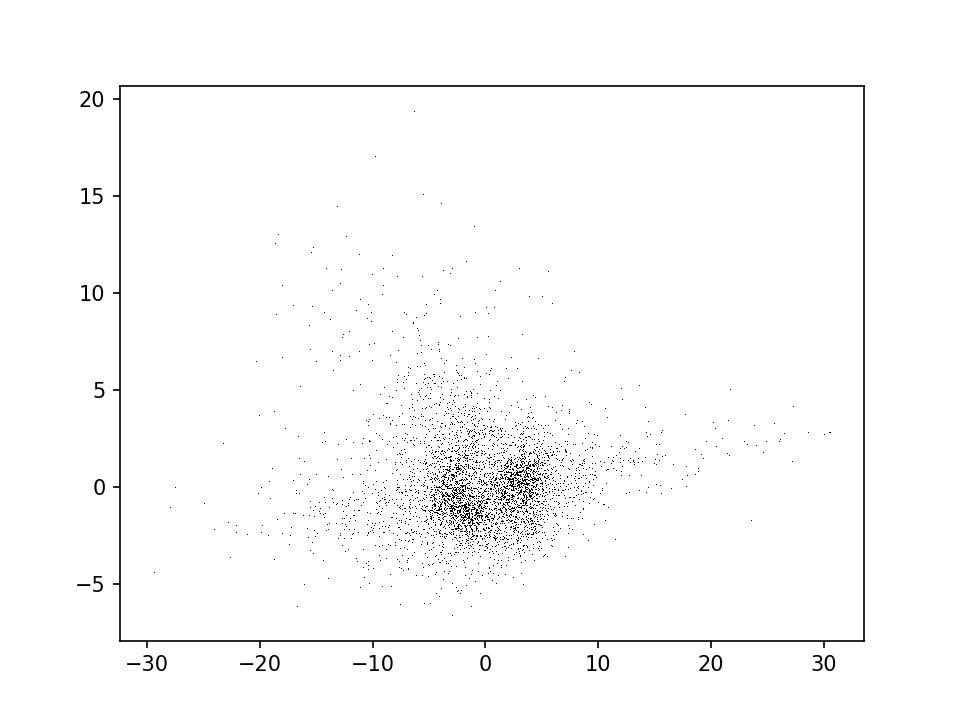

In [30]:
fig = plt.figure()
plt.plot(Pcut2x[:,0],Pcut2x[:,1],"k,")

In [31]:
import Bio.Cluster as Pycluster

In [32]:
%%time
tree = Pycluster.treecluster(Acut2x, dist="u", method="m")

CPU times: user 20.4 s, sys: 288 ms, total: 20.7 s
Wall time: 21.2 s


In [33]:
record = Pycluster.Record()
record.data = np.hstack((Acut2x,Pcut2x))
record.geneid = orfs[:]
record.genename = names[:]
record.gweight = None
record.gorder = None
record.expid = header[:]+["PC%02d" % i for i in range(len(header))]
record.eweight = None
record.eorder = None
record.uniqid = "UNIQID"
record.save("PCA_clustering_example1.um", geneclusters = tree)

In [34]:
!ls *exammple*

ls: cannot access '*exammple*': No such file or directory


In [35]:
!ls *example*

PCA_clustering_example1.um.annotated.cdt  PCA_clustering_example1.um.gtr
PCA_clustering_example1.um.cdt


In [36]:
fp = open("PCA_clustering_example1.um.cdt")
header = next(fp).split("\t")
header[:10]

['GID',
 'UNIQID',
 'NAME',
 'GWEIGHT',
 'BMDM_Live_1_4h',
 'BMDM_Live_1_24h',
 'BMDM_Live_2_4h',
 'BMDM_Live_2_24h',
 'BMDM_Live_3_4h',
 'BMDM_Live_3_24h']

In [37]:
out = open("PCA_clustering_example1.um.annotated.cdt","w")
out.write("\t".join(header[:3]+["rank"]+header[3:]))

839

In [38]:
eweights = next(fp).split("\t")
eweights[:10]

['EWEIGHT',
 '',
 '',
 '',
 '1.000000',
 '1.000000',
 '1.000000',
 '1.000000',
 '1.000000',
 '1.000000']

In [39]:
out.write("\t".join(header[:3]+[""]+header[3:]))

835

In [40]:
for (n,line) in enumerate(fp):
    row = line.split("\t")
    out.write("\t".join(row[:3]+[str(n)]+row[3:]))

In [41]:
out.close()

In [44]:
x = [[0,2],[2,3],[-1,5]]

In [45]:
x

[[0, 2], [2, 3], [-1, 5]]

In [46]:
def mykey(i):
    return i[1]
y = sorted(x, key = mykey)

In [47]:
y

[[0, 2], [2, 3], [-1, 5]]

In [48]:
def mykey(i):
    return i[0]
y = sorted(x, key = mykey)

In [49]:
y

[[-1, 5], [0, 2], [2, 3]]